<a href="https://colab.research.google.com/github/EvasivePanda/Asteroseismology/blob/main/asteroseismology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all packages neccessary for analysis

In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sbn
from numpy import argmax


This code will read the dataset and load it as a pandas dataframe

In [ ]:
df = pd.read_csv('/content/sample_data/classification_in_asteroseismology.csv')
df.columns


Index(['POP', 'Dnu', 'numax', 'epsilon'], dtype='object')

Population class predictions for Kepler red giants
Population as follows:
0 = RGB
1 = HeB

RGB (Red-Giant-Branch)
HeB (Helium Burning)

Pop is our value we are trying to predict so we will place this seperately from the predictors.

In [ ]:
y = df['POP']
df = df.drop(columns = ['POP'], axis =1)
y.head(5)

0    1
1    0
2    1
3    1
4    0
Name: POP, dtype: int64

Next, this code will create a correlation plot 

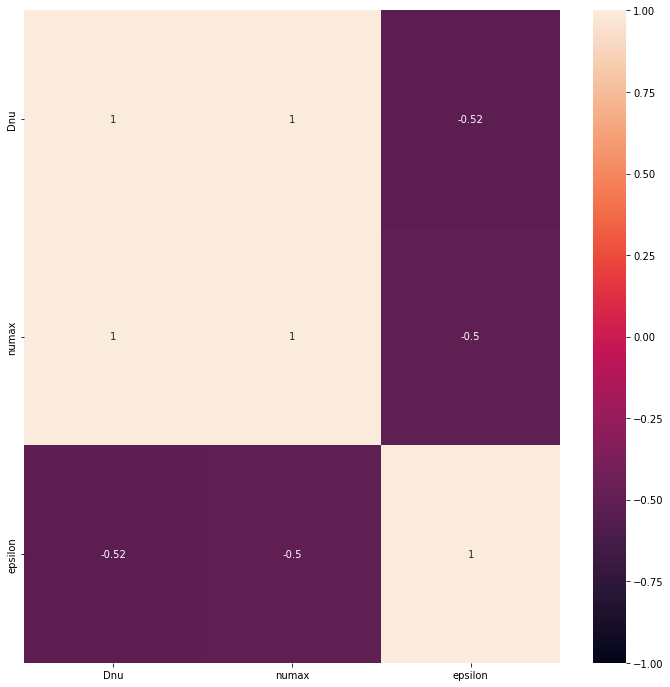

In [ ]:
corr = df.corr()
plt.figure(figsize=[12,12])
sbn.heatmap(corr,annot=True, vmax=1.0,vmin=-1.0,)
plt.show()

In [ ]:
df.describe()

,numax,epsilon
count,1001.000000,1001.000000
mean,58.441771,0.610774
std,43.425561,0.342518
min,17.979780,0.005000
25%,32.924350,0.220000
50%,38.293160,0.815000
75%,70.140830,0.890000
max,239.648480,1.000000


In [ ]:
#Checking the datatypes of the values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   numax    1001 non-null   float64
 1   epsilon  1001 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
#Checking for if there are null values in the dataset
df.isnull().sum()

numax      0
epsilon    0
dtype: int64

In [ ]:
#Standard scaler is done to keep all values of the dataset in a range of 0-1 inclusive and have a normal distribution
df = StandardScaler().fit_transform(df)

In [ ]:
#Change the datatype saved to be float 32 for tensorflow usage
y = np.asarray(y).astype('float32')
df = np.asarray(df).astype('float32')

In [ ]:
#Split the dataset into a training section and a testing section
x_train, x_test, y_train, y_test = train_test_split(df,y, test_size = .30, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(700, 2)
(301, 2)
(700,)
(301,)


To try to find the best model I will create multiple models of different compositions in order to try to find the best model for this task.

In [ ]:
mapOfAccLoss = {}

Epoch 1/5
700/700 [==============================] - 7s 4ms/step - loss: 0.3193 - accuracy: 0.9143 - val_loss: 0.2317 - val_accuracy: 0.9236
Epoch 2/5
700/700 [==============================] - 3s 4ms/step - loss: 0.2046 - accuracy: 0.9386 - val_loss: 0.2057 - val_accuracy: 0.9402
Epoch 3/5
700/700 [==============================] - 3s 4ms/step - loss: 0.1893 - accuracy: 0.9357 - val_loss: 0.1992 - val_accuracy: 0.9435
Epoch 4/5
700/700 [==============================] - 3s 4ms/step - loss: 0.1845 - accuracy: 0.9329 - val_loss: 0.1964 - val_accuracy: 0.9435
Epoch 5/5
700/700 [==============================] - 3s 4ms/step - loss: 0.1814 - accuracy: 0.9314 - val_loss: 0.1947 - val_accuracy: 0.9435
adam
Test loss: 0.19466321170330048
Test accuracy: 0.9435216188430786


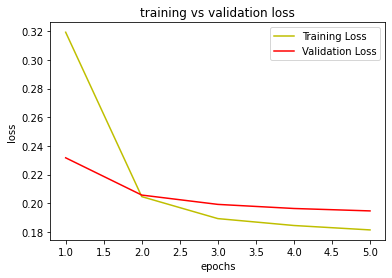

In [ ]:

input_shape=[x_train.shape[1]]
model=Sequential()

model.add(Dense(8,activation='relu',input_shape = input_shape))
#model2.add(Dropout(0.6))

model.add(Dense(1, activation = 'sigmoid'))
#model2.add(Dropout(0.6))

optimizers= ['adam']#, 'SGD', 'adamax', 'RMSprop','adadelta', 'adagrad', 'nadam', 'Ftrl']
for opti in optimizers:
  model.compile(optimizer=opti,loss='BinaryCrossentropy',metrics=['accuracy'])
  history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=5,batch_size=1,verbose=1)

#Evaluation of model
  loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
  print(opti)
  print('Test loss:', loss)
  print('Test accuracy:', accuracy)
  mapOfAccLoss[opti] = [loss, accuracy]

#Printing the loss values
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,1+len(loss))
plt.plot(epochs, loss, 'y', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("training vs validation loss")
plt.legend()
plt.show()

The first value is the loss value and the next value is the models accuracy.

In [ ]:
print(mapOfAccLoss)

{'adam': [0.19466321170330048, 0.9435216188430786]}


In [ ]:
mapOfAccLoss2 = {}

adam
Test loss: 0.09927242994308472
Test accuracy: 97.34219312667847%


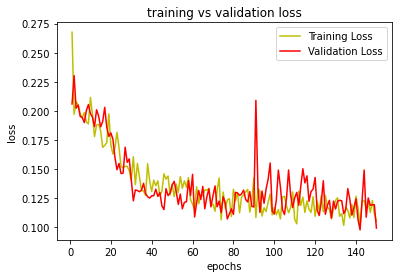

In [ ]:
input_shape=[x_train.shape[1]]
model2=Sequential()

model2.add(Dense(64,activation='relu',input_shape = input_shape))
model2.add(Dropout(0.2))

model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(16,activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(1, activation = 'sigmoid'))


model2.compile(optimizer="adam",loss='BinaryCrossentropy',metrics=['accuracy'])


history=model2.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=150,batch_size=1,verbose=0)

#Evaluation of model
loss, accuracy = model2.evaluate(x_test, y_test, verbose=0)
print('adam')
print('Test loss:', loss)
print('Test accuracy: {}%'.format(accuracy*100))
mapOfAccLoss2['adam'] = [loss, accuracy]

#Printing the loss values
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,1+len(loss))
plt.plot(epochs, loss, 'y', label= 'Training Loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("training vs validation loss")
plt.legend()
plt.show()

In [ ]:
print(mapOfAccLoss2)

{'adam': [0.09927242994308472, 0.9734219312667847]}


Using the better model. I will do some sample predictions based on the test data.

In [ ]:
probability_model = keras.Sequential([model2, keras.layers.ReLU()])
predictions = probability_model.predict(x_test)
for x in range(len(predictions)):
  if predictions[x] >.5:
    predictions[x] =1
  else:
    predictions[x] =0

Small representation of the models predictions versus the actual value.

In [ ]:
print("predicted      ||  actual value")
print("________________________________\n")
for x in range(40):
  print("{} ||  {}".format(predictions[x], y_test[x]))

predicted      ||  actual value
________________________________

[1.] ||  1.0
[0.] ||  0.0
[1.] ||  1.0
[0.] ||  0.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[0.] ||  0.0
[0.] ||  0.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[0.] ||  0.0
[1.] ||  1.0
[1.] ||  0.0
[0.] ||  0.0
[0.] ||  0.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[0.] ||  0.0
[1.] ||  1.0
[0.] ||  0.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[0.] ||  0.0
[0.] ||  0.0
[1.] ||  1.0
[1.] ||  1.0
[1.] ||  1.0
[0.] ||  0.0


Confusion matrix of the models performance on testing data.

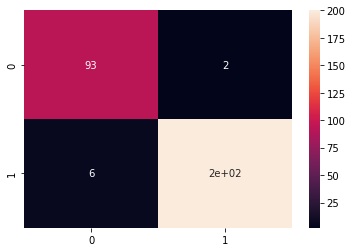

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sbn.heatmap(cm, annot=True)